In [32]:
from tqst_class import *

In [33]:
tomo = tQST(2)
nq = tomo.get_num_of_qubits()
print(nq)
N=nq**2

diagonal = np.zeros(N)
diagonal[0]=1/2
diagonal[3]=1/2
# diagonal[12]=1/4
# diagonal[15]=1/4
print(diagonal)
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 2.
2
[0.5 0.  0.  0.5]
Diagonal counts are now set.
The threshold is now set to 0.16666666666666666.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+
nb of measurement necessary:  (2,)


1. dare i veri valori della diagonale

In [34]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename_diag='\Tomo_18Dic_Diag_Diego_fb'
fpath=DIR+folder+filename_diag


print("Loading... ", filename_diag)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)

binary_strings=data[:,0]
coinc=data[:,1]
diag_type_TB=data[:,6]
diag_type_FB=data[:,9]

## Order the binary data
indexed_binary_strings = enumerate(binary_strings)
sorted_with_indexes = sorted(indexed_binary_strings, key=lambda x: int(x[1], 2))

# Extract sorted strings and their original indexes
sorted_strings = [x[1] for x in sorted_with_indexes]
sorted_indexes = [x[0] for x in sorted_with_indexes]

diag_coinc=coinc[sorted_indexes]
diag_type_TB=diag_type_TB[sorted_indexes]
diag_type_FB=diag_type_FB[sorted_indexes]

print("Sorted Binary Strings:", sorted_strings)
print("Original Indexes:", sorted_indexes)
print("original coinc:", coinc)
print("diag_coinc, ordered:", diag_coinc)
print("Type time-bin, ordered:", diag_type_TB)
print("Type freq-bin, ordered:", diag_type_FB)

# Convert each string to a float
diag_coinc_arr = [float(x) for x in diag_coinc]
# tomo.set_diagonal_counts(diag_coinc_arr)

Loading...  \Tomo_18Dic_Diag_Diego_fb
Sorted Binary Strings: ['00', '01', '10', '11']
Original Indexes: [0, 2, 3, 1]
original coinc: [' 276.0' ' 157.0' ' 0.0' ' 1.0']
diag_coinc, ordered: [' 276.0' ' 0.0' ' 1.0' ' 157.0']
Type time-bin, ordered: [' 00' ' 00' ' 00' ' 00']
Type freq-bin, ordered: [' 00' ' 01' ' 10' ' 11']


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_5724\749974414.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename_diag='\Tomo_18Dic_Diag_Diego_fb'


In [40]:
## if you want to calculate again the projector with the measured diagonal elements

gini = dmt.gini_index(diag_coinc_arr)
# threshold = tomo.set_threshold(gini)
threshold=0.1

offd_projs = tomo.get_projs_to_measure()

These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+


2. dare i counts misurati per ciascun proiettore (ancora ideali)

In [35]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename='\Tomo_18Dic_all_Diego_fb'
fpath=DIR+folder+filename

### Proj, Coinc, ph_s0, ph_i0, ph_s1, ph_i1, type_tb, ph_RF_s, ph_RF_i, type_fb
print("Loading... ", filename)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)
settings_TB=np.zeros([4,len(data)])
settings_FB=np.zeros([2,len(data)])

proj_name=data[:,0]
print(proj_name)
coinc=data[:,1]
settings_TB[0,:]=data[:,2]
settings_TB[1,]=data[:,3]
settings_TB[2,:]=data[:,4]
settings_TB[3,:]=data[:,5]
type_TB=data[:,6]
settings_FB[0,:]=data[:,7]
settings_FB[1,:]=data[:,8]
settings_FB=np.deg2rad(settings_FB)
type_FB=data[:,9]
# Convert each string to a float
coinc_arr = np.asarray([float(x) for x in coinc])
print(coinc_arr)

Loading...  \Tomo_18Dic_all_Diego_fb
['DD' 'DR']
[238.  77.]


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_5724\4283852060.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename='\Tomo_18Dic_all_Diego_fb'


Diagonal counts are now set.
(6, 4)
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


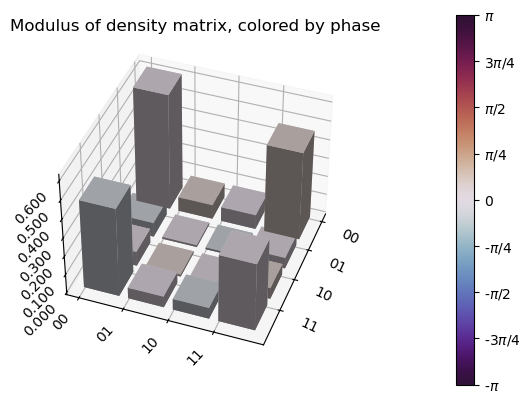

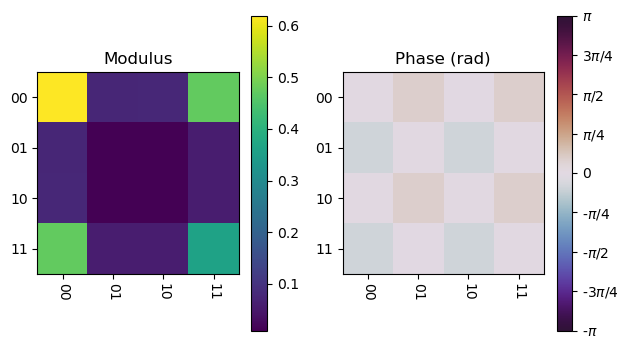

In [36]:
# coinc_arr.transpose()
# proj_name.transpose()
tomo.set_diagonal_counts(diag_coinc_arr/np.sum(diag_coinc_arr))
tomo.set_projs_and_counts(proj_name, coinc_arr/np.sum(coinc_arr))
projs, counts = tomo.get_projs_and_counts()
print(np.shape(projs))
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)
dmt.plot_density_matrix_2D(rho_rec)

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


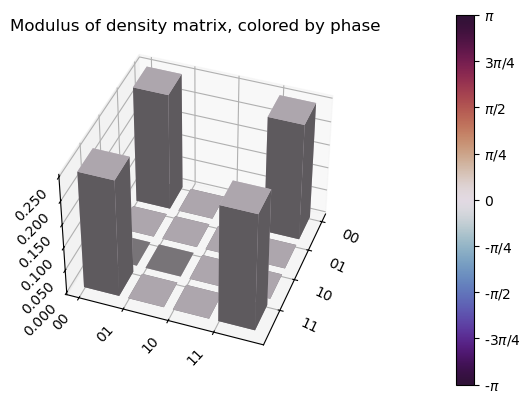

0.687785963719725
0.9999996843847652


In [37]:
## Ideal density matrix

psi_true=np.zeros(N)
psi_true[0]=1/2
psi_true[3]=1/2
# psi_true[12]=1/2
# psi_true[15]=1/2
rho_true=np.outer(psi_true,psi_true)

dmt.plot_density_matrix_3D(rho_true)

f=dmt.fidelity(rho_rec,rho_true)
print(f)
pur=dmt.purity(rho_rec)
print(pur)

3. Now let's set our real projectors...

TO be considered:
- losses (to implement)
- post selection factors


In [68]:
def W_tb_si_func(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l):
    W=np.zeros([4,4], dtype=np.complex128)
    W[0,0]=Css*np.exp((phs_s+phi_s)*1.0j)
    W[1,0]=Csl*np.exp((phs_s+phi_l)*1.0j)
    W[2,0]=Cls*np.exp((phs_l+phi_s)*1.0j)
    W[3,0]=Cll*np.exp((phs_l+phi_l)*1.0j)
    W[1,1]= W[0,0]
    W[2,2]= W[0,0]
    W[3,3]= W[0,0]
    W[3,1]= W[2,0]
    W[3,2]= W[1,0]
    
    return W

def W_fb_func(J0, J1, J_1, theta):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0] = J0
    W[1,1] = W[0,0]
    W[0,1] = J1*np.exp(theta*1.0j)
    W[1,0] = -J_1*np.exp(-theta*1.0j)

    return W

def W_fb_si_func(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
    W_s=W_fb_func(J0_s, J1_s, J_1_s, ph_s)
    W_i=W_fb_func(J0_i, J1_i, J_1_i, ph_i)
    W=np.kron(W_s,W_i) 

    return W


In [45]:
## try if the matrixes work

# W_tb_si(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l)
W_tb_si=W_tb_si_func(1.42732558, 1.20348837, 1.2005814, 1.0, 0, 0, 0.0, np.pi/2)
print(W_tb_si)

# W_fb_si(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
W_fb_si=W_fb_si_func(1,1,1,0,1,1,1,0)
print(W_fb_si)

Wexp=np.kron(W_tb_si,W_fb_si)
print(Wexp)

[[1.42732558e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [7.36924090e-17+1.20348837j 1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.20058140e+00+0.j         0.00000000e+00+0.j
  1.42732558e+00+0.j         0.00000000e+00+0.j        ]
 [6.12323400e-17+1.j         1.20058140e+00+0.j
  7.36924090e-17+1.20348837j 1.42732558e+00+0.j        ]]
[[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]]
[[1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e+00+0.j         1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e

Ideal proj diag:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj diag:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Ideal proj diag:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Exp proj diag:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
Exp proj diag:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Exp proj diag:  [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Coinc diag:  [0.6359447  0.         0.00230415 0.36175115 0.         0.        ]
0
4
Base:  HH
Proj:  DD
(0.5744562646538028, 0.5744562646538028, 0.5744562646538028, 0.0, 0.5744562646538028, 0.5744562646538028, 0.5744562646538028, 0.0)
Ideal proj:  [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
Exp proj:  [0.33+0.j 0.33+0.j 0.33+0.j 0.33+0.j]
1
5
Base:  HH
Proj:  DR
(0.5744562646538028, 0.5744562646538028, 0.5744562646538028, 0.0, 0.5744562646538028, 0.5744562646538028, 0.5744562646538028, 1.5707963267948966)
Ideal proj:  [0.5+0.j  0. +0.5j 0.5+0.j  0. +0.5j]
Exp proj:  [3.30000000e-01+0.j   2.02066722e-17-0.33j 3.30000000e-01+0.

c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


(6, 4)
[0.6359447  0.         0.00230415 0.36175115 0.75555556 0.24444444]


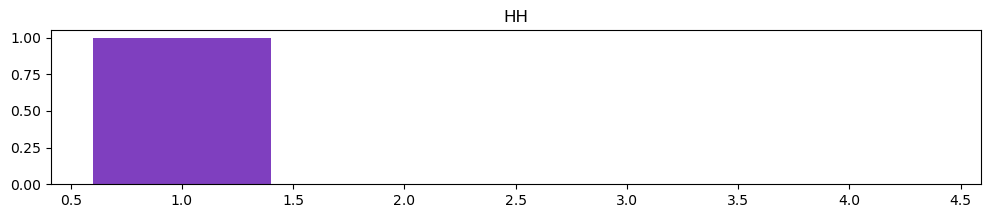

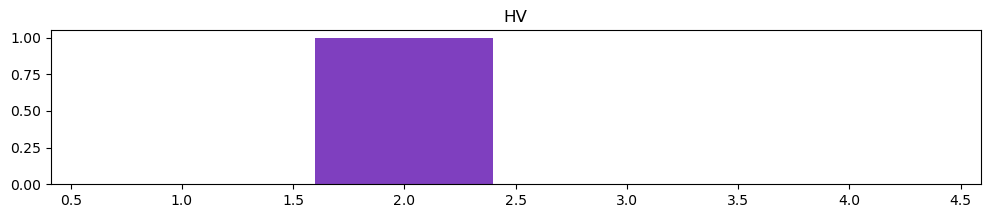

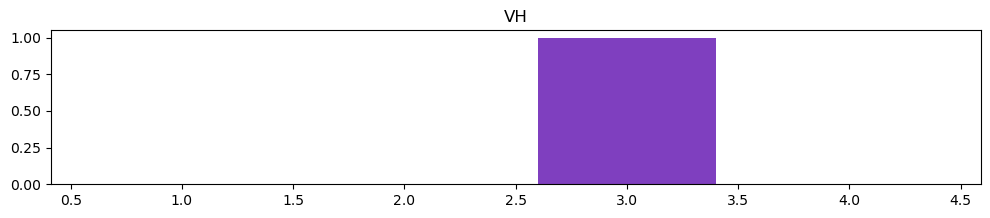

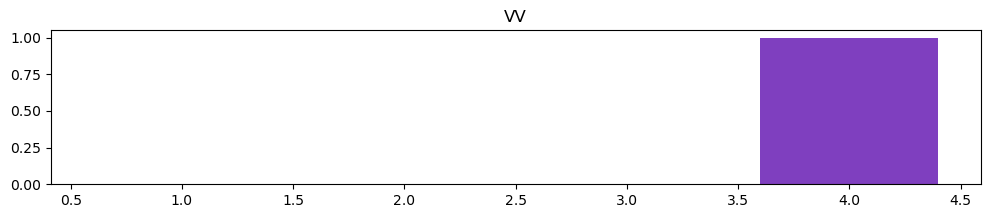

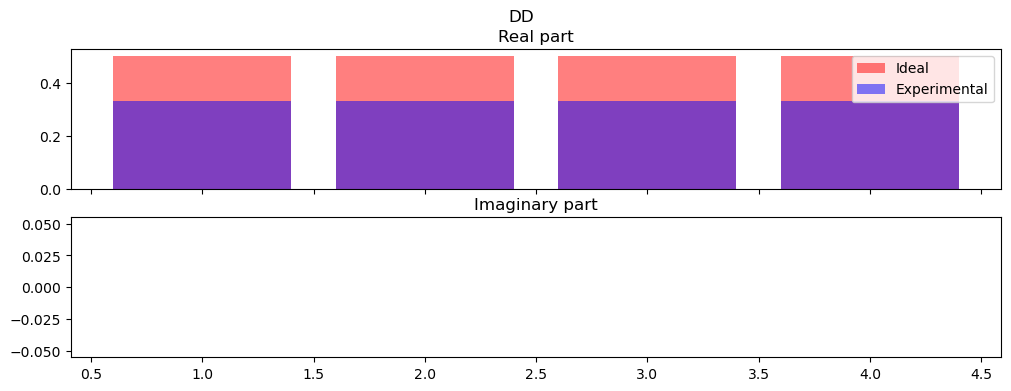

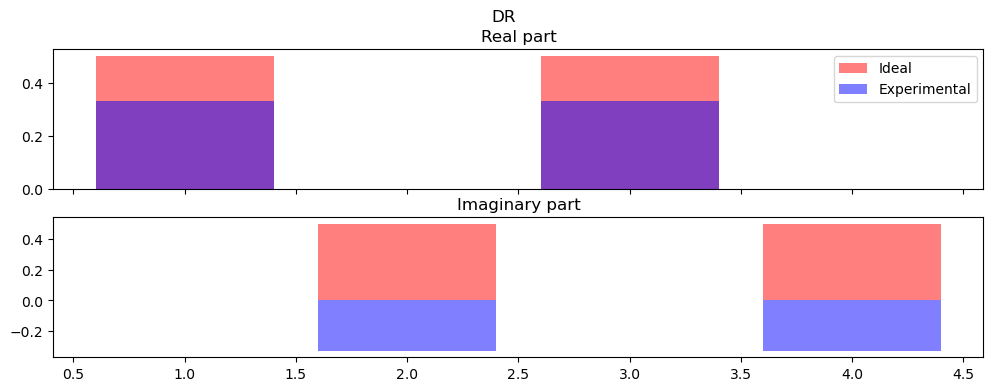

In [75]:
# 1.42732558 1.20348837 1.2005814  1.         file: 6Dic /Pin-3dBm_Phase0.0_300s_F2_1pLong


#Proj_dict[offd_projs[0]]['vect']
diag_name=np.array(['HH','HV','VH','VV'])
NbProj=len(offd_projs)
base = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj_exp = np.zeros([NbProj+N,N], dtype=np.complex128)
Coinc_exp = np.zeros([NbProj+N])


for i in range(N):
    ## DIAG, is measured with thelong arm of the MZI close, so no norm is needed

    Coinc_exp[i]=diag_coinc_arr[i]/np.sum(diag_coinc_arr)
    base[i,:]=prj.extended_projector_from_string(diag_name[i])
    Proj[i,:]=prj.extended_projector_from_string(diag_name[i])
    # print(diag_name[i])

    ## FB, for the basis, the modulator is always OFF
    J0=1.0
    J1=0.0
    J_1=0.0


    ## for each projector, define the matrix Wexp with the correct parameters
    # W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,0,0)
    # print(W_tb_si)
    W_fb_si=W_fb_si_func(J0,J1,J_1,0.0,J0,J1,J_1,0.0)
    Wexp=W_fb_si
    # print(W_fb_si)
    # Wexp=np.kron(W_tb_si.conj(),W_fb_si)
    # proj_2=np.outer(Proj[i,:],Proj[i,:])
    # W=np.matmul(Wexp.conj().T,proj_2)
    Wexp_2=Wexp
    Proj_exp[i,:]=np.dot(Wexp_2,base[i,:])
    print('Ideal proj diag: ', Proj[i,:])
    print('Exp proj diag: ', Proj_exp[i,:])

    ## plot projector (diag)
    fig, ax= plt.subplots(figsize=(12, 2), ncols=1, nrows=1)
    ax.bar(np.linspace(1,N,N),Proj[i,:], label='Ideal', color='red', alpha=0.5)
    ax.bar(np.linspace(1,N,N),Proj_exp[i,:], label='Experimental', color='blue', alpha=0.5)
    ax.set_title(diag_name[i])
# print('Coinc with losses:', np.matmul(Proj_exp,Coinc_exp))
   
print('Coinc diag: ', Coinc_exp)

for p in range(NbProj):

    if type_FB[p]==' 00':
        string_FB='HH'
    if type_FB[p]=='01':
        string_FB='HV'
    if type_FB[p]==' 10':
        string_FB='VS'
    if type_FB[p]==' 11':
        string_FB='VV'
    
    if proj_name[p][0:2]=='DD' or proj_name[p][0:2]=='DR' or proj_name[p][0:2]=='RD' or proj_name[p][0:2]=='RR':
        # print('superposition :', proj_name[p][2:4])
        J0=np.sqrt(0.33)
        J1=np.sqrt(0.33)
        J_1=np.sqrt(0.33)
    else:
        # print('not superposition :', proj_name[p][2:4])
        J0=1.0
        J1=0.0
        J_1=0.0

    pr=p+N
    print(p)
    print(pr)
    base[pr,:]=prj.extended_projector_from_string(string_FB)
    print('Base: ', string_FB)
    # print(base[pr,:])
    ## for each projector, define the matrix Wexp with the correct parameters
    print('Proj: ', proj_name[p])

    
    # W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p])
    # print((Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p]))
    # print(W_tb_si)
    W_fb_si=W_fb_si_func(J0,J1,J_1,settings_FB[0,p],J0,J1,J_1,settings_FB[1,p])
    print((J0,J1,J_1,settings_FB[0,p],J0,J1,J_1,settings_FB[1,p]))
    Wexp=W_fb_si
    # print(W_fb_si)
    # exp=np.kron(W_tb_si.conj(),W_fb_si)
    # print(Wexp)
    ######

    Proj[pr,:]=prj.extended_projector_from_string(proj_name[p])
    Wexp_2=Wexp.conj().T

    print('Ideal proj: ', Proj[pr,:])
    Coinc_exp[pr]=coinc_arr[p]/np.sum(coinc_arr)
    Proj_exp[pr,:]=np.dot(Wexp_2,base[pr,:])
    print('Exp proj: ', Proj_exp[pr,:])

    ##plot projectors
    fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)
    axr.bar(np.linspace(1,N,N),np.real(Proj[pr,:]), label='Ideal', color='red', alpha=0.5)
    axr.bar(np.linspace(1,N,N),np.real(Proj_exp[pr,:]), label='Experimental', color='blue', alpha=0.5)
    axr.set_title('Real part')
    axi.bar(np.linspace(1,N,N),np.imag(Proj[pr,:]), label='Ideal', color='red', alpha=0.5)
    axi.bar(np.linspace(1,N,N),np.imag(Proj_exp[pr,:]), label='Experimental', color='blue', alpha=0.5)
    axi.set_title('Imaginary part')
    fig.suptitle(proj_name[p])
    axr.legend()

# print(proj_name)
# print(Proj_exp)
print(Proj_exp.shape)
print(Coinc_exp)

# Proj_exp_2=np.outer(Proj_exp,Proj_exp)
## shoud I do the same also for the diagonal elements ??? 

The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


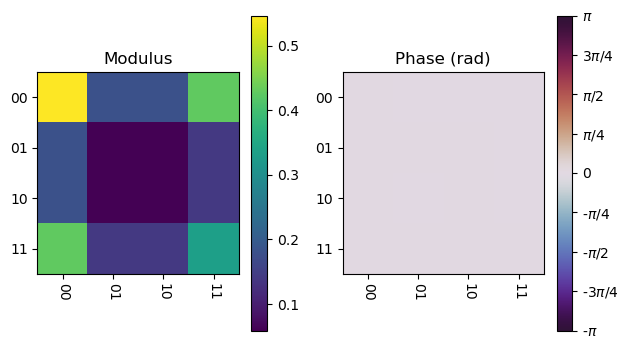

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


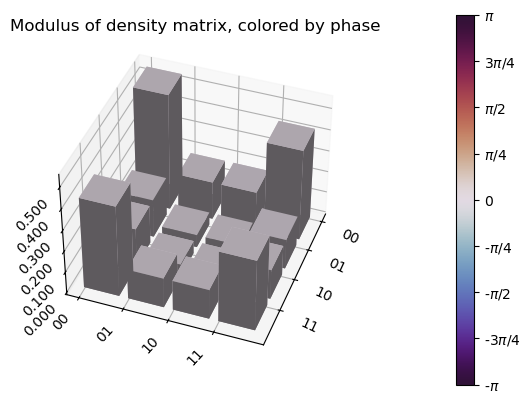

Fidelity:  0.6589958535811378
Purity:  0.9999997835490781


In [76]:
# tomo.set_projs_and_counts(proj_name, coinc_arr)
# projs, counts = tomo.get_projs_and_counts()
# print(np.shape(projs))
# print(projs)
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp)
# rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp/np.sum(diag_coinc_arr))

dmt.plot_density_matrix_2D(rho_rec)
dmt.plot_density_matrix_3D(rho_rec)

f=dmt.fidelity(rho_rec,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec)
print('Purity: ', pur)